In [1]:
data_dir = './data/'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA


[0.72770452 0.23030523]
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


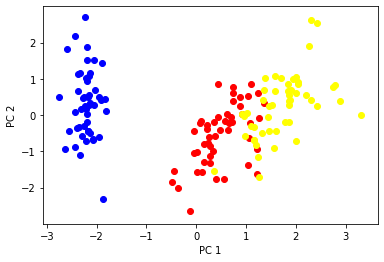

In [2]:
# まず具体例
iris = pd.read_csv(data_dir+'iris.csv') # csvの読み込み
X = iris.drop('class', axis=1) # Xは正解クラスを除く4次元の情報
Y = iris['class'] # Yは正解クラス

X_scaled = (X-X.mean())/X.std() # Xの正規化

# 主成分分析(PCA)
pca = PCA(n_components=2) # PCAのパラメータをセット(2次元)
pca.fit(X_scaled) # PCAでXを2次元にするルール作り
reduced_iris = pca.fit_transform(X_scaled) # 2次元にしたXをゲット

# 2次元に圧縮したXをプロット
colors = ['blue', 'red', 'Yellow'] # グラフの色
uniqueY = pd.unique(Y) # 重複したクラスを削除（クラスのリストを取得）
for i in range(len(uniqueY)):
    Yi = uniqueY[i]
    color = colors[i]
    plt.scatter(reduced_iris[np.where(Y == Yi), 0],
                             reduced_iris[np.where(Y == Yi), 1],c=color) # Xをプロット
plt.xlabel('PC 1') # X軸のラベル
plt.ylabel('PC 2') # Y軸のラベル


print(pca.explained_variance_ratio_) # 2次元の各主成分の「寄与率」

print(pca.components_) # 2次元の各主成分の「中身」


[[0.68569351 1.27368233]
 [1.27368233 3.11317942]]


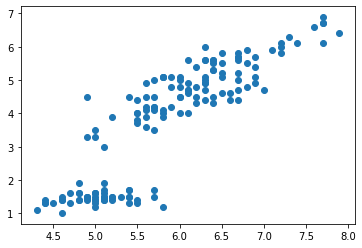

In [3]:
# covariance between sepal_length and petal_length in iris data

sepal_length = np.array(iris['sepal length'])
petal_length = np.array(iris['petal length'])
CC = np.cov(sepal_length,petal_length) # 共分散行列
print(CC)
plt.scatter(sepal_length,petal_length) # 散布図をプロット


In [4]:
# 固有値と固有ベクトル
A = np.matrix([[2,3], [2,1]])

from numpy import linalg as LA

# 固有値と固有ベクトルを算出
(eigenvalues, eigenvectors) = LA.eig(A)

print(eigenvalues) # 固有値
print(eigenvectors) # 固有ベクトル

# 本当に合ってるか確認
e_vec1 = eigenvectors[:,0] # 第一固有ベクトル
e_val1 = eigenvalues[0] # 第一固有値

# 固有ベクトルの条件を満たしている(Ae = λe)
print(np.dot(A, e_vec1))
print(e_val1*e_vec1)

[ 4. -1.]
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]
[[3.32820118]
 [2.21880078]]
[[3.32820118]
 [2.21880078]]


In [5]:
# sepal_length　と petal_length の共分散行列の固有値
# Read iris dataset
iris = pd.read_csv(data_dir+'iris.csv')
X = iris.drop(['sepal width','petal width','class'], axis=1)

# Normalize the data
# 正規化なし
#X_scaled = (X-X.mean())/X.std()
X_scaled = (X-X.mean())

# Transform input data into an np.array
Y = np.array(X_scaled)


In [6]:
# Compute the covariance matrix
cov_matrix = np.cov(Y.transpose())

# Compute the eigen values and eigen vectors
(l,V) = np.linalg.eig(cov_matrix)

print("Explained variance ratio: ", l/l.sum())
print("the 2 principal vectors: \n", V.transpose())


Explained variance ratio:  [0.03686636 0.96313364]
the 2 principal vectors: 
 [[-0.91920275  0.39378459]
 [-0.39378459 -0.91920275]]


In [7]:
# PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# 先程の結果とPCA関数による結果を比較
print(pca.explained_variance_ratio_) # 2次元の各主成分の「寄与率」
print(pca.components_) # 2次元の各主成分の「中身」

A = pca.components_


[0.96313364 0.03686636]
[[ 0.39378459  0.91920275]
 [-0.91920275  0.39378459]]


(-4, 4)

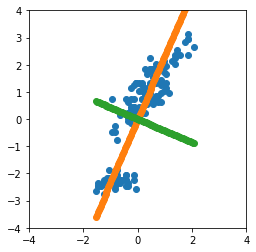

In [8]:
# 第一主成分
a = A[0][1]/A[0][0]
xx = [min(X_scaled['sepal length']) + 0.01*(max(X_scaled['sepal length'])
-min(X_scaled['sepal length']))*i for i in range(101)]
yy = [xx[i]*a for i in range(len(xx))]
# 第二主成分
b = A[1][1]/A[1][0]
xx2 = [min(X_scaled['sepal length']) + 0.01*(max(X_scaled['sepal length'])
-min(X_scaled['sepal length']))*i for i in range(101)]
yy2 = [xx2[i]*b for i in range(len(xx))]
# 表示
plt.scatter(X_scaled['sepal length'],X_scaled['petal length'])
plt.scatter(xx,yy)
plt.scatter(xx2,yy2)
plt.axis('scaled')
plt.xlim([-4,4])
plt.ylim([-4,4])


In [9]:

##### 正規化あり
X_scaled = (X-X.mean())/X.std()

# Transform input data into an np.array
Y = np.array(X_scaled)

# Compute the covariance matrix
cov_matrix = np.cov(Y.transpose())

# Compute the eigen values and eigen vectors
(l,V) = np.linalg.eig(cov_matrix)

print("Explained variance ratio: ", l/l.sum())
print("the 2 principal vectors: \n", V.transpose())


Explained variance ratio:  [0.93587708 0.06412292]
the 2 principal vectors: 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [10]:
# PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# 先程の結果とPCA関数による結果を比較
print(pca.explained_variance_ratio_) # 2次元の各主成分の「寄与率」
print(pca.components_) # 2次元の各主成分の「中身」

A = pca.components_


[0.93587708 0.06412292]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


(-4, 4)

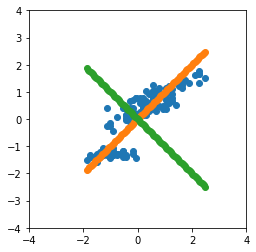

In [11]:
# 第一主成分
a = A[0][1]/A[0][0]
xx = [min(X_scaled['sepal length']) + 0.01*(max(X_scaled['sepal length'])
-min(X_scaled['sepal length']))*i for i in range(101)]
yy = [xx[i]*a for i in range(len(xx))]
# 第二主成分
b = A[1][1]/A[1][0]
xx2 = [min(X_scaled['sepal length']) + 0.01*(max(X_scaled['sepal length'])
-min(X_scaled['sepal length']))*i for i in range(101)]
yy2 = [xx2[i]*b for i in range(len(xx))]
# 表示
plt.scatter(X_scaled['sepal length'],X_scaled['petal length'])
plt.scatter(xx,yy)
plt.scatter(xx2,yy2)
plt.axis('scaled')
plt.xlim([-4,4])
plt.ylim([-4,4])